## **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', None)

## **DATA COLLECTION AND ANALYSIS**

In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    # sum['value_counts']=train.value_counts()
    # sum['skew'] = train.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Time,float64,0,0.000000,124592,284807,0.000000,172792.000000,94813.859575
V1,float64,0,0.000000,275663,284807,-56.407510,2.454930,0.000000
V2,float64,0,0.000000,275663,284807,-72.715728,22.057729,0.000000
V3,float64,0,0.000000,275663,284807,-48.325589,9.382558,-0.000000
V4,float64,0,0.000000,275663,284807,-5.683171,16.875344,0.000000
V5,float64,0,0.000000,275663,284807,-113.743307,34.801666,0.000000
V6,float64,0,0.000000,275663,284807,-26.160506,73.301626,0.000000
V7,float64,0,0.000000,275663,284807,-43.557242,120.589494,-0.000000
V8,float64,0,0.000000,275663,284807,-73.216718,20.007208,0.000000
V9,float64,0,0.000000,275663,284807,-13.434066,15.594995,-0.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

1081

## **VISUALIZATION**

<Axes: >

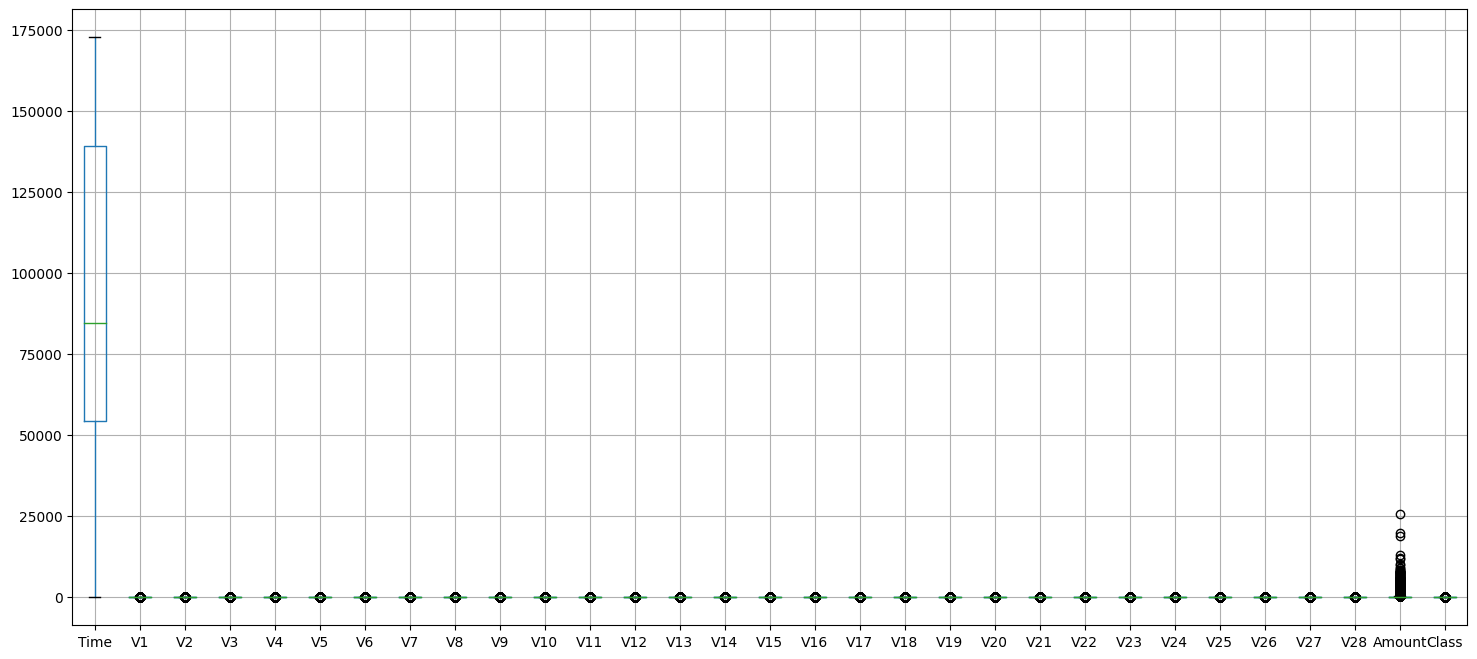

In [8]:
# according to this we will see high fluctuation in amount data 
plt.figure(figsize=(18,8))
df.boxplot()

<Axes: ylabel='Amount'>

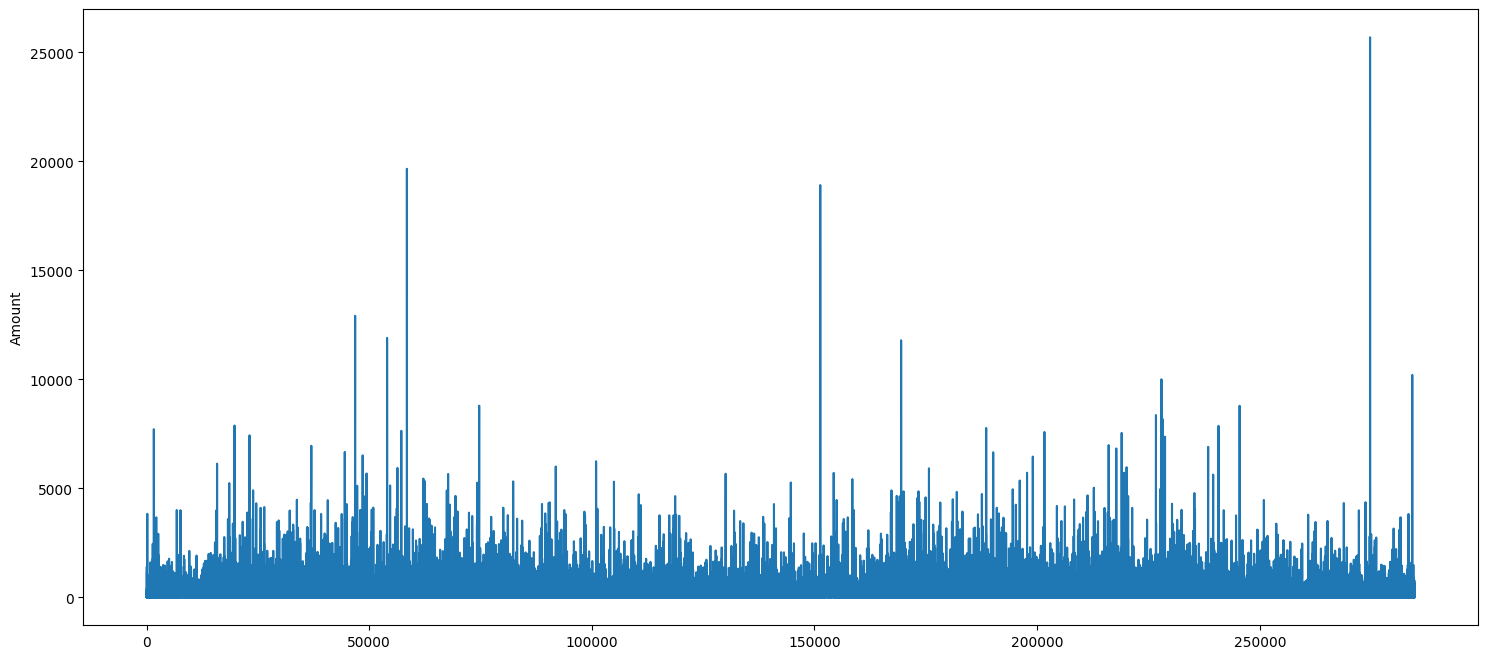

In [9]:
# too much fluctuation in amount 
plt.figure(figsize=(18,8))
sns.lineplot(df['Amount'])

<Axes: xlabel='Class', ylabel='count'>

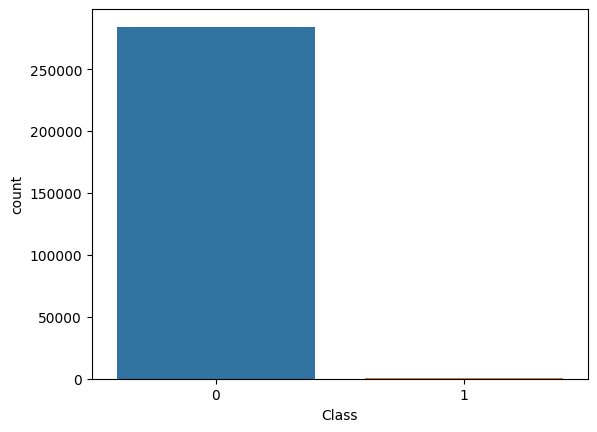

In [10]:
# highly imbalanced data we having
sns.countplot(x=df["Class"])

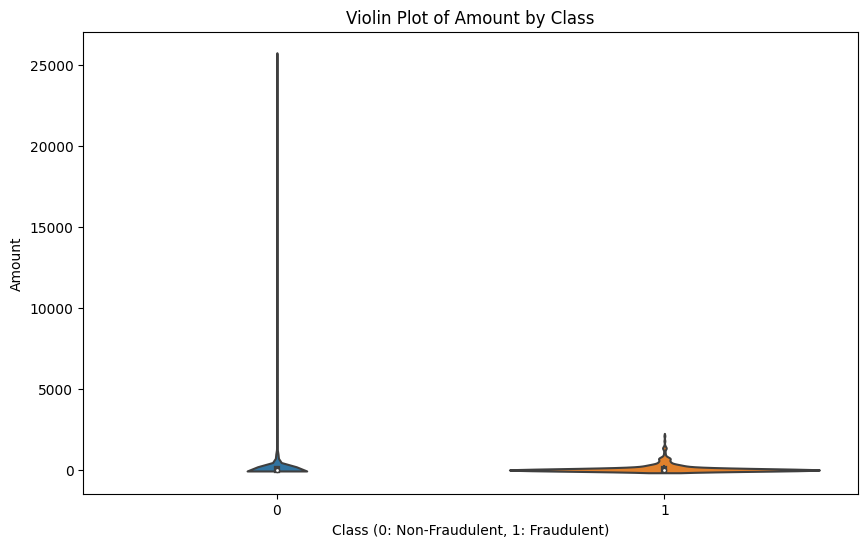

In [11]:
# we can see the fraud amount was less than non fraud, non fraud amount was about 25k also 
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=df)
plt.title('Violin Plot of Amount by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()


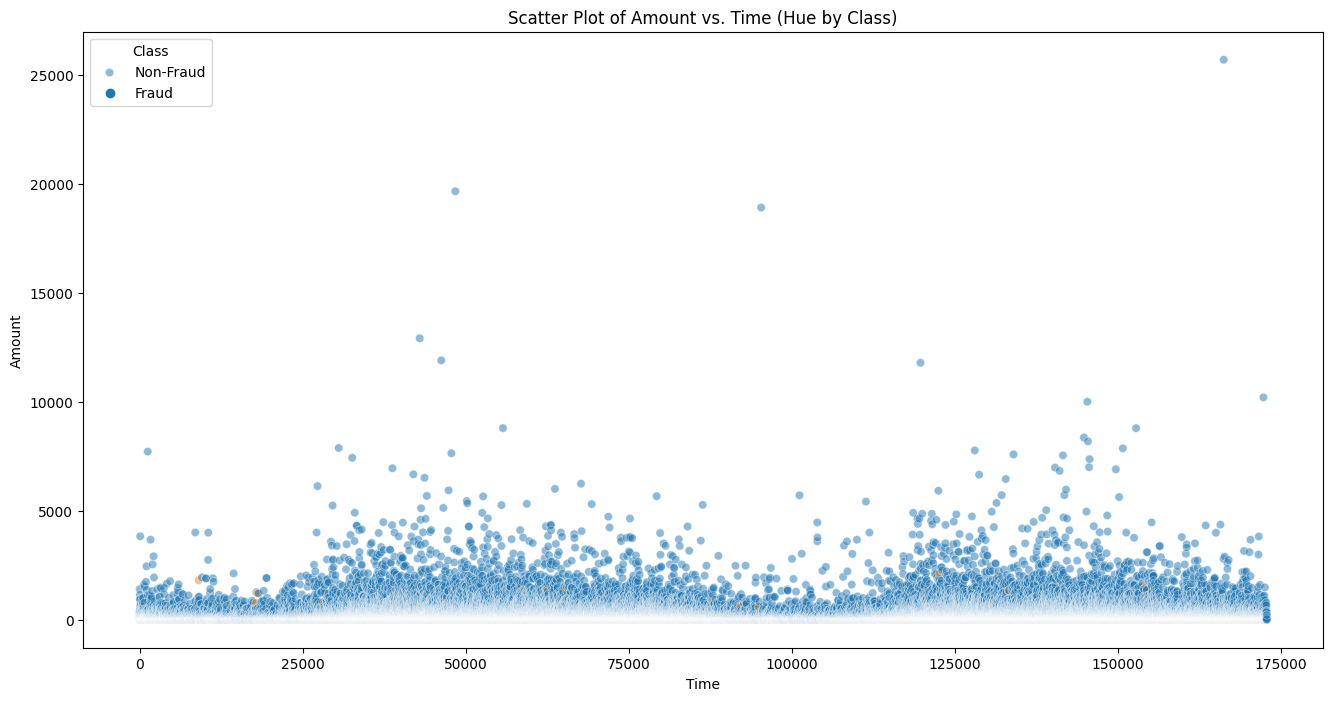

In [12]:
# we can see the fraud amount was less than non fraud, non fraud amount was about 25k also 
plt.figure(figsize=(16, 8))
sns.scatterplot(x="Time", y="Amount", hue="Class", data=df, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Scatter Plot of Amount vs. Time (Hue by Class)")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])
plt.show()


In [13]:
# dropping duplicates
df.drop_duplicates(inplace=True)


In [14]:
cols = df.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

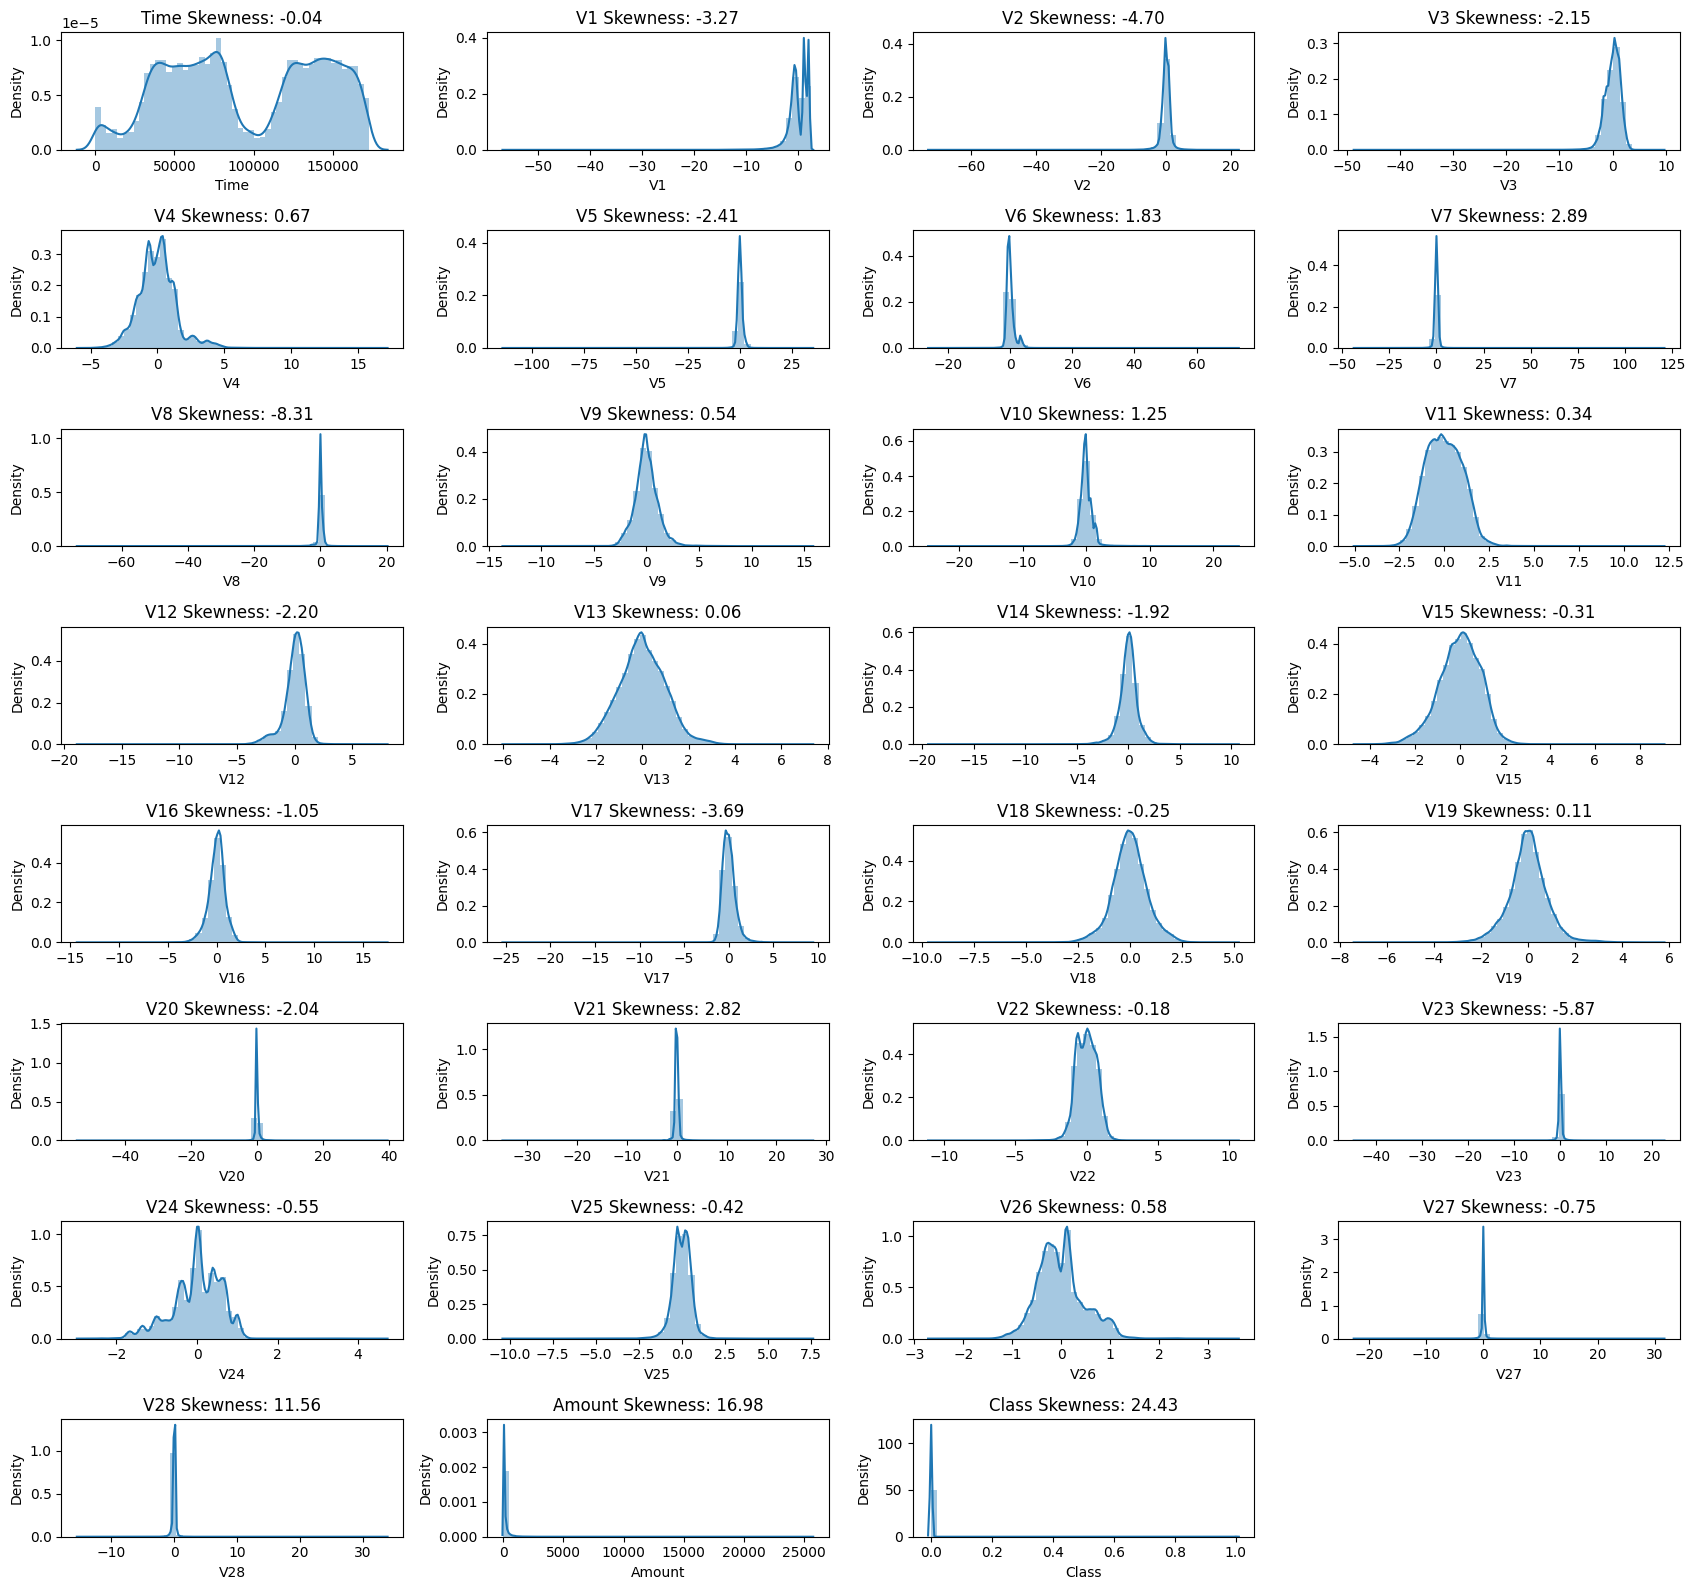

In [15]:
# skewness of individual features
k = 0
num_rows = 8  # Change this to the desired number of rows
num_cols = 4  # Change this to the desired number of columns

plt.figure(figsize=(17, 2 * num_rows))  # Adjust the figure size based on the number of rows

for col in cols:
    k += 1
    plt.subplot(num_rows, num_cols, k)
    sns.distplot(df[col])
    plt.title(f'{col} Skewness: {df[col].skew():.2f}')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


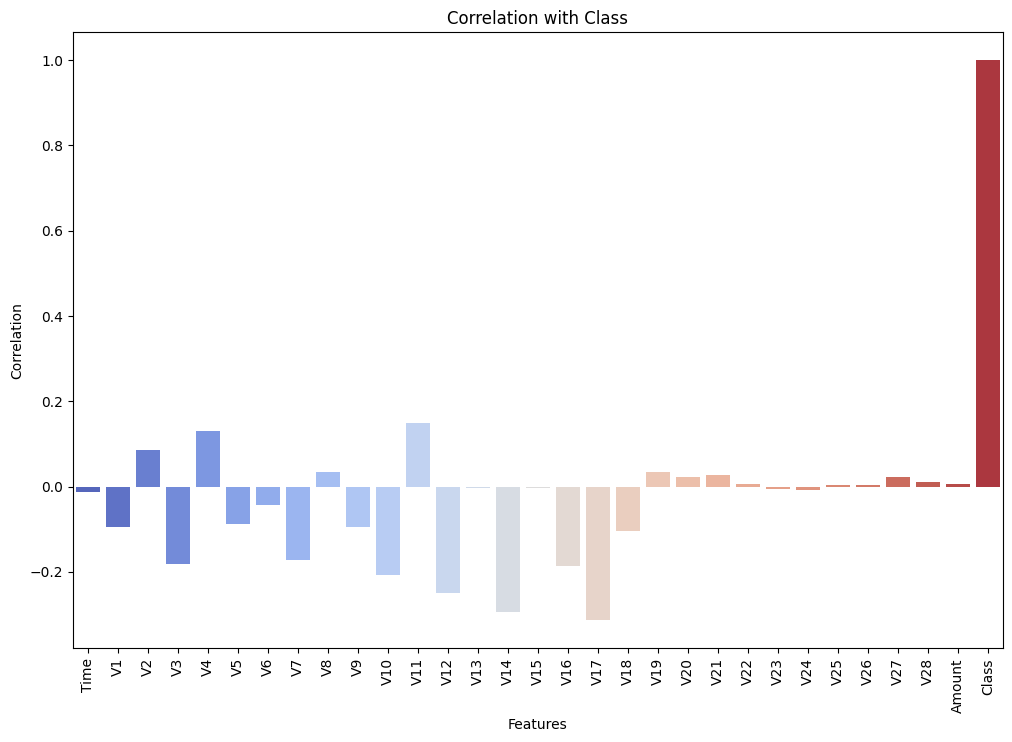

In [16]:
# Calculate the correlation among feature and class
correlation_matrix = df.corr()

# Create a barplot from the correlation matrix
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


## **SPLITTING**

In [17]:
x=df.drop(['Class'],axis=1)
y=df['Class']

In [18]:
# smoting 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [19]:
print(x_sm.shape)
print(y_sm.shape)

(566506, 30)
(566506,)


In [20]:
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_sm)

## **Train test split**

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y_sm,test_size=0.2,random_state=142)

In [22]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(class_rep)

## **LOGISTIC REGRESSION**

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
ypred_train_lgr=lgr.predict(xtrain)
ypred_test_lgr=lgr.predict(xtest)

In [25]:
acc_report(ytrain,ypred_train_lgr)
acc_report(ytest,ypred_test_lgr)

the accuracy of tha model is  0.9789520833884962
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    226652
           1       0.99      0.97      0.98    226552

    accuracy                           0.98    453204
   macro avg       0.98      0.98      0.98    453204
weighted avg       0.98      0.98      0.98    453204

the accuracy of tha model is  0.9786764576088683
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56601
           1       0.99      0.97      0.98     56701

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



In [26]:
# ROC Curve function
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [27]:
y_train_pred_proba = lgr.predict_proba(xtrain)[:,1]


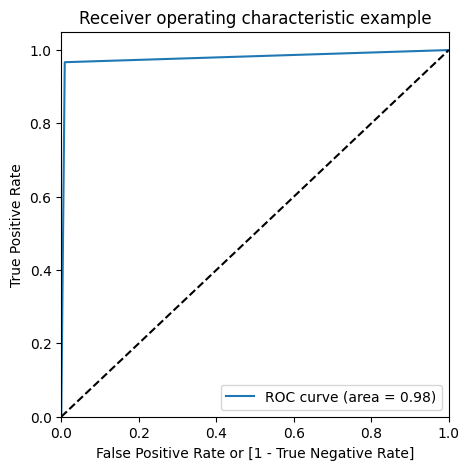

In [28]:
draw_roc(ytrain, ypred_train_lgr)


In [29]:
y_test_pred_proba = lgr.predict_proba(xtest)[:,1]


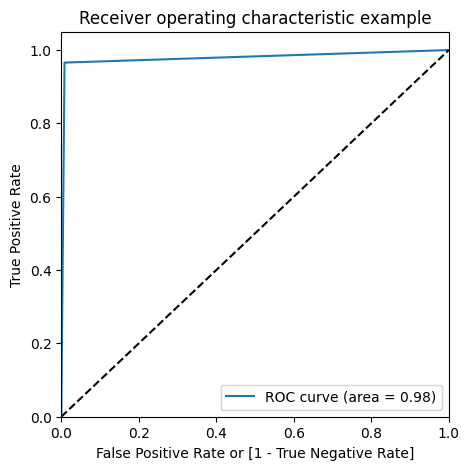

In [30]:
draw_roc(ytest, ypred_test_lgr)


## **RANDOM FOREST** 

In [31]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred_rf_train=rf.predict(xtrain)
ypred_rf_test=rf.predict(xtest)

In [32]:
acc_report(ytrain,ypred_rf_train)
acc_report(ytest,ypred_rf_test)


the accuracy of tha model is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226652
           1       1.00      1.00      1.00    226552

    accuracy                           1.00    453204
   macro avg       1.00      1.00      1.00    453204
weighted avg       1.00      1.00      1.00    453204

the accuracy of tha model is  0.999894088365607
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56601
           1       1.00      1.00      1.00     56701

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [33]:
y_train_pred_proba = rf.predict_proba(xtrain)[:,1]


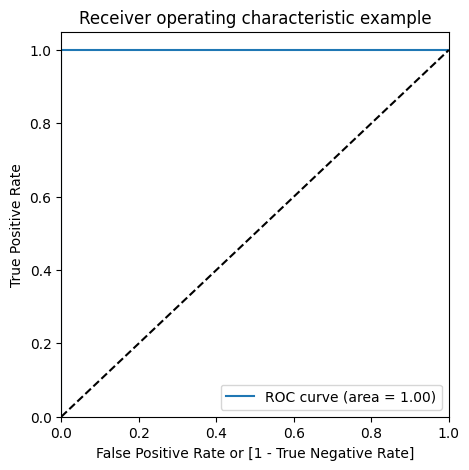

In [34]:
draw_roc(ytrain, ypred_rf_train)


In [35]:
y_test_pred_proba = lgr.predict_proba(xtest)[:,1]


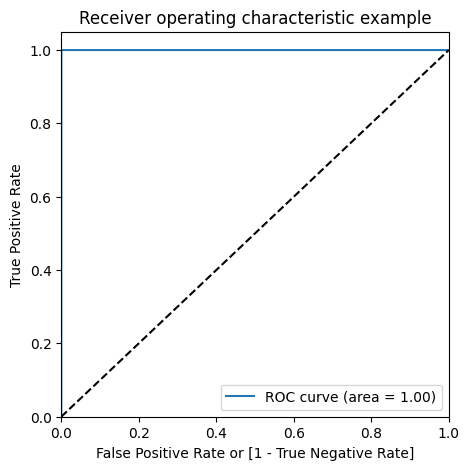

In [36]:
draw_roc(ytest, ypred_rf_test)


## **BOTH MODEL PERFORMING GOOD**